In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import gsw
from matplotlib.ticker import MaxNLocator

import cartopy as cart
import cartopy.crs as ccrs
import cmocean.cm as cmo
import seaborn as sns
from glob import glob


In [2]:
ss = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/SA_5179m_s02_t50.nc')

# Simulation 60 m

In [3]:
sim_60 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/SA_60m_s02_t1800.nc')

In [4]:
aa = np.isnan(sim_60['abs_salinity'].where(cond=sim_60['abs_salinity'] < 1))

In [5]:
~aa

<xarray.DataArray 'abs_salinity' (traj: 100000, obs: 1801)>
array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  abs_salinity
    units:          unknown

In [7]:
sim_60['abs_salinity'][:,:]

<xarray.DataArray 'abs_salinity' (traj: 100000, obs: 1801)>
array([[ 0.      , 35.627968, 35.56084 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.627968, 35.56819 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.627968, 35.56084 , ...,       nan,       nan,
              nan],
       ...,
       [ 0.      , 35.627968, 35.56084 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.575825, 35.56819 , ...,       nan,       nan,
              nan],
       [ 0.      , 35.627968, 35.56084 , ..., 34.504753, 34.492542,
        34.46985 ]], dtype=float32)
Dimensions without coordinates: traj, obs
Attributes:
    long_name:      
    standard_name:  abs_salinity
    units:          unknown

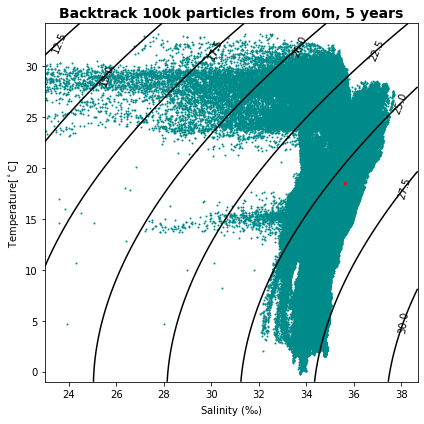

In [8]:
max_sal, min_sal = sim_60['abs_salinity'].max(), 24
max_temp, min_temp = sim_60['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(6,6))

# for i in range(1000
plt.scatter(sim_60['abs_salinity'][1:, :], sim_60['cons_temperature'][1:, :], s=1, color='darkcyan');
plt.scatter(sim_60['abs_salinity'][0,1], sim_60['cons_temperature'][0, 1], s=5, color='red')

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 60m, 5 years',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(min_sal - 1, max_sal + 1)
plt.tight_layout()


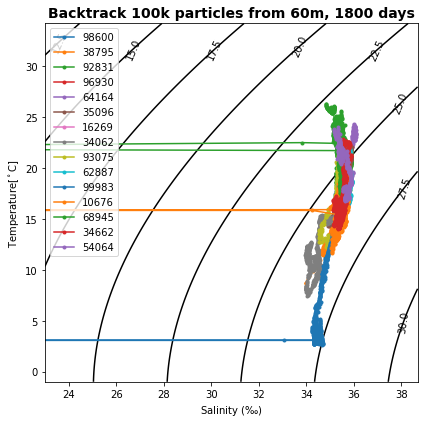

In [9]:
max_sal, min_sal = sim_60['abs_salinity'].max(), 24
max_temp, min_temp = sim_60['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(6,6))

rand_traj = np.random.choice(100000, 15)
for i in rand_traj:
    traj = sim_60['abs_salinity'][i,1:]
    i_sal = sim_60['abs_salinity'][i,1:][~np.isnan(traj)]
    i_temp = sim_60['cons_temperature'][i,1:][~np.isnan(traj)]
    plt.plot(i_sal, i_temp, '.-', label=i);
    
cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 60m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(min_sal - 1, max_sal + 1)
plt.tight_layout()
plt.legend()

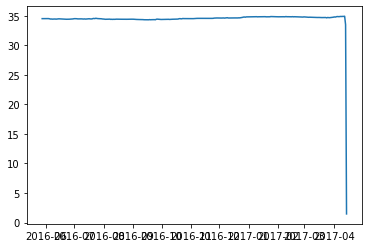

In [22]:
n = 90
plt.plot(sim_60['time'][0,n:], sim_60['abs_salinity'][0,n:])

In [24]:
sim_60['time'][0,990]

<xarray.DataArray 'time' ()>
array('2017-04-14T12:00:00.000000000', dtype='datetime64[ns]')
Attributes:
    long_name:      
    standard_name:  time
    axis:           T

In [28]:
sim_60['abs_salinity'][0,990]

<xarray.DataArray 'abs_salinity' ()>
array(1.4592112, dtype=float32)
Attributes:
    long_name:      
    standard_name:  abs_salinity
    units:          unknown

In [26]:
np.where(sim_60['abs_salinity'][0,10:]<30)

(array([980]),)

In [34]:
xr.load_dataset('/storage/shared/oceanparcels/input_data/MOi/psy4v3r1/psy4v3r1-daily_2D_2017-04-14.nc')

<xarray.Dataset>
Dimensions:       (y: 3059, x: 4322, deptht: 1)
Coordinates:
    nav_lon       (y, x) float32 72.92 73.0 73.08 73.17 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
  * deptht        (deptht) float64 1.0
  * x             (x) int32 1 2 3 4 5 6 7 ... 4316 4317 4318 4319 4320 4321 4322
  * y             (y) int32 1 2 3 4 5 6 7 ... 3053 3054 3055 3056 3057 3058 3059
    time_counter  datetime64[ns] 2017-04-14T12:00:00
Data variables:
    sossheig      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sodynhei      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    somxlavt      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    somxlt02      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    somxl010      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sosstobs      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    socelatf      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sorunoff      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sobarhei      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sotausrf      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sotaubot      (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    bottomT       (deptht, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.0
    file_name:    ORCA12_LIM-T00_y2021m10d25_grid2D.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2021-OCT-31 18:27:17 GMT-0000
    references:   http://www.mercator-ocean.eu

In [32]:
S_wrong[]

<xarray.Dataset>
Dimensions:       (deptht: 50, x: 4322, y: 3059)
Coordinates:
  * deptht        (deptht) float64 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * x             (x) int32 1 2 3 4 5 6 7 ... 4316 4317 4318 4319 4320 4321 4322
  * y             (y) int32 1 2 3 4 5 6 7 ... 3053 3054 3055 3056 3057 3058 3059
    time_counter  datetime64[ns] 2017-04-14T12:00:00
    nav_lon       (y, x) float32 72.92 73.0 73.08 73.17 ... 73.0 73.0 73.0 73.0
    nav_lat       (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.0 50.0 50.0
Data variables:
    vosaline      (deptht, y, x) float32 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
Attributes:
    Conventions:  CF-1.0
    file_name:    ORCA12_LIM-T00_y2022m01d03_gridS.nc
    institution:  MERCATOR OCEAN
    source:       NEMO
    TimeStamp:    2022-JAN-09 18:33:20 GMT-0000
    references:   http://www.mercator-ocean.eu

In [33]:
gsw.SA_from_SP(S_wrong['vosaline'])

TypeError: SA_from_SP() missing 3 required positional arguments: 'p', 'lon', and 'lat'

# simulation 5000 m

In [41]:
sim_5000 = xr.load_dataset('/storage/shared/oceanparcels/output_data/data_Claudio/SA_5179m_s02_t1800.nc')

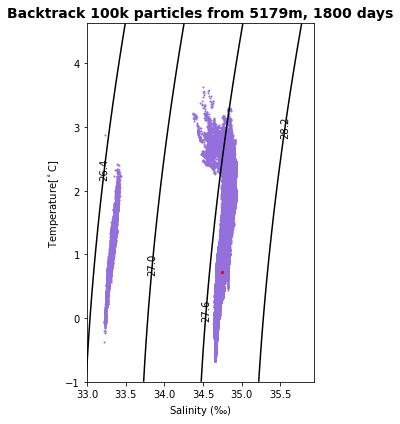

In [98]:
max_sal, min_sal = sim_5000['abs_salinity'].max(), 32
max_temp, min_temp = sim_5000['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

# for i in range(1000
plt.scatter(sim_5000['abs_salinity'][1:, :], sim_5000['cons_temperature'][1:, :], s=1, color='mediumpurple');
plt.scatter(sim_5000['abs_salinity'][0,1], sim_5000['cons_temperature'][0, 1], s=5, color='red')

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 5179m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
plt.tight_layout()

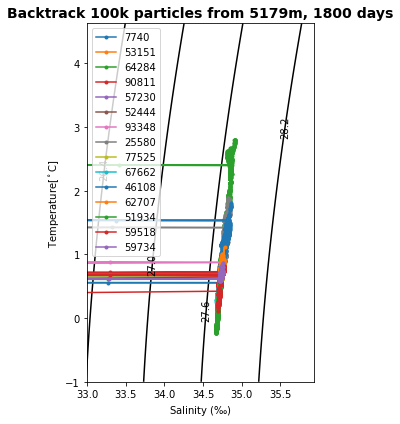

In [99]:
max_sal, min_sal = sim_5000['abs_salinity'].max(), 32
max_temp, min_temp = sim_5000['cons_temperature'].max(), 0

tempL = np.linspace(min_temp - 1, max_temp + 1, 156)
salL = np.linspace(min_sal - 1, max_sal + 1, 156)
Tg, Sg = np.meshgrid(tempL,salL)

sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 156)

fig, ax = plt.subplots(figsize=(4,6))

rand_traj = np.random.choice(100000, 15)
for i in rand_traj:
    traj = sim_5000['abs_salinity'][i,1:]
    i_sal = sim_5000['abs_salinity'][i,1:][~np.isnan(traj)]
    i_temp = sim_5000['cons_temperature'][i,1:][~np.isnan(traj)]
    plt.plot(i_sal, i_temp, '.-', label=i);

cs = ax.contour(Sg, Tg, sigma_theta, colors='k', zorder=1)
cl = plt.clabel(cs, fontsize=10, inline=False, fmt='%.1f')

ax.set_xlabel('Salinity ($‰$)')
ax.set_ylabel('Temperature[$^\circ$C]')
ax.set_title('Backtrack 100k particles from 5179m, 1800 days',fontsize=14, fontweight='bold')

ax.tick_params(direction='out')
ax.set_xlim(33, max_sal + 1)
plt.tight_layout()
plt.legend(loc = 'upper left')

### Find the bug

There might be a file for salinity that was g/kg units, and that is bringing the salinty to 0 at some points. Mission: Find which file it is.